In [42]:
import pandas as pd
import numpy as np
import matplotlib as plot
import re
from statistics import pstdev
import math
%matplotlib inline

In [43]:
#Read the Files in
respondents = pd.read_csv('atusdata/atusresp_2013.dat')
summary = pd.read_csv("atusdata/atussum_2013.dat")
activity = pd.read_csv('atusdata/atusact_2013.dat')

In [44]:
#Rename the the Case ID to match the rest, display the file
summary = summary.rename(columns={'tucaseid': 'TUCASEID'})
summary.head()


,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Display the respondents file
respondents.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [46]:
# Display the activity File
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUDURSTOP,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20130101130004,1,-1,0,0,0,-1,0,0,-1,...,2,-1,04:00:00,12:00:00,1,1,1,10101,101,0
1,20130101130004,2,1,5,5,0,-1,5,5,-1,...,1,-1,12:00:00,12:05:00,11,1,1,110101,1101,0
2,20130101130004,3,1,120,120,0,-1,120,120,-1,...,1,-1,12:05:00,14:05:00,12,3,3,120303,1203,0
3,20130101130004,4,1,0,0,0,-1,0,0,-1,...,2,-1,14:05:00,19:00:00,6,3,1,60301,603,0
4,20130101130004,5,1,30,30,0,-1,30,30,-1,...,1,-1,19:00:00,19:30:00,11,1,1,110101,1101,0


#First Quesiton: Do people who work in computer and math spend less time participating in sports and exercise? 

In [47]:
# Create an over 18 statement
adults_over_18_crit = summary.TEAGE >= 18
#Return all ROWS that age is over 18
adults_over_18 = summary[adults_over_18_crit]
#limit the table to only the ID, Weight and AGE
adults_over_18 = adults_over_18[['TUCASEID','TUFINLWGT', 'TEAGE']]

In [48]:
adults_over_18.head()

,TUCASEID,TUFINLWGT,TEAGE
0,20130101130004,11899905.662034,22
1,20130101130112,4447638.009513,39
2,20130101130123,10377056.507734,47
3,20130101130611,7731257.992805,50
4,20130101130616,4725269.227067,45


In [49]:
"""Creates a table of people who work in computer and math field"""
programmers = respondents[respondents.TRDTIND1 == 3]
programmers = programmers[['TUCASEID', 'TRDTIND1']]
programmers.head()

,TUCASEID,TRDTIND1
117,20130111120111,3
244,20130111121805,3
665,20130112121419,3
776,20130112121711,3
945,20130112122183,3


In [50]:
# INNER join the Data (default merge type) on TUCASEID in both tables
data = pd.merge(adults_over_18, programmers, left_on="TUCASEID", right_on="TUCASEID")

In [51]:
data.head()

,TUCASEID,TUFINLWGT,TEAGE,TRDTIND1
0,20130111120111,9195857.630884,31,3
1,20130111121805,9925312.871228,49,3
2,20130112121419,12388916.492393,57,3
3,20130112121711,3011634.118480,34,3
4,20130112122183,6511965.889353,31,3


In [52]:
data.WEIGHTED_AGE = data.TUFINLWGT * data.TEAGE

In [53]:
#Found an awesome floating point error. (This won't round)
round(data.WEIGHTED_AGE.sum() / data.TUFINLWGT.sum(), 2)

#But found the fix...Print it, or turn it into a string first

37.369999999999997

In [54]:
#Average Age of a Computer and Math people
programmer_age_mean = round(data.WEIGHTED_AGE.sum() / data.TUFINLWGT.sum(), 2)
print(programmer_age_mean)

37.37


In [55]:
# I did not write this, but I didn't know how to calculate weighted standard deviation
def weighted_std(values, weights):
    """
    Return the weighted standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (math.sqrt(variance))

In [58]:
#Show the weighted standard deviation of age of Computer and mathematical science occupations
programmer_age_dev = round(weighted_std(data.TEAGE, data.TUFINLWGT), 3)
print(programmer_age_dev)

13.139


In [59]:
#The Unweighed standard deviation, for comparision. 
round(pstdev(data.TEAGE),3)

11.957

In [ ]:
"""This creates a new table with the entire population within 1 standard dev
of the age of computer and math jobs"""
pop_age_like_programmers = summary[summary.TEAGE >= (programmer_age_mean - programmer_age_dev)]
pop_age_like_programmers = pop_age_like_programmers[summary.TEAGE <= (programmer_age_mean + programmer_age_dev)]
pop_age_like_programmers.head()

In [61]:
#Return all codes below a tier
def activity_columns(data, activity_code):
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [62]:
#Function to calculate average minutes spent doing an activity
def average_minutes2(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    data = data[['TUFINLWGT']]
    data['minutes'] = activity_sums
    data = data.rename(columns={"TUFINLWGT":"weight"})
    data['weighted_minutes'] = data.weight * data.minutes
    return data.weighted_minutes.sum() / data.weight.sum()

In [63]:
"""The average amount of time the general population spends participating in Sports"""
average_minutes2(summary, "1301")

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


17.837249981245161

In [64]:
"""The average amount of time the people close to the average
age of computer and math professinals spend participating in Sports"""
average_minutes2(pop_age_like_programmers, "1301")

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15.065166741484896

In [65]:
"""Create a new table for people with computer and math jobs within 1 standard devation
of the mean age"""
programmers_age_sports = data[['TUCASEID']]
programmers_age_sports = pd.merge(programmers_age_sports, pop_age_like_programmers, left_on="TUCASEID", right_on="TUCASEID")

In [66]:
"""The average minutes people with computer and math jobs and who are 1 standard devation 
from the mean age spend participating is sports"""
average_minutes2(programmers_age_sports, "1301")

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


49.191801294424153

###Answer: The typical computer and math person actually spends significantly more time participating in sports and exercise than the average american in the same age range

#Second question: How does age relate to sports and exercise?

In [67]:
"""sums all minutes under a code and returns a series"""
def total_minutes(data, activity_code):
    cols = activity_columns(data, activity_code)
    activity_data = data[cols]
    activity_sums = activity_data.sum(axis=1)
    return activity_sums

In [125]:
"""Creates a table with just ID, age and minutes spent playing sports"""
pop_sports_minutes = summary[['TEAGE']]
pop_sports_minutes['minutes'] = total_minutes(summary, '1301')


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


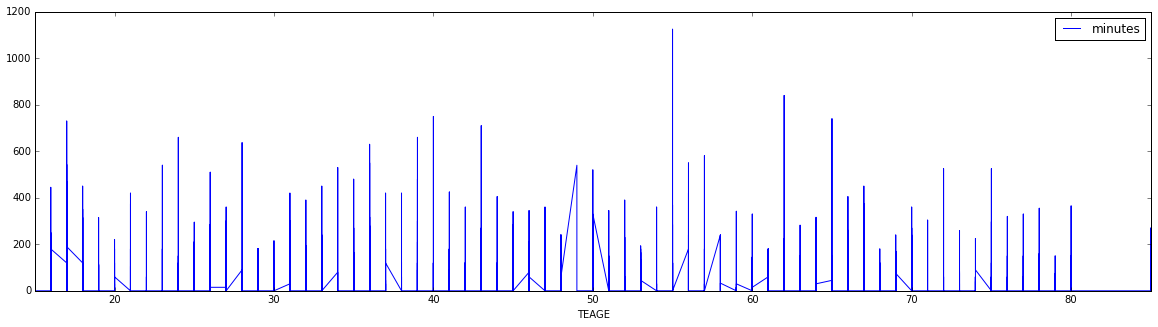

In [126]:
"""Creates a plot graphing minutes spent playing sports by age"""
"""This doesn't really work because some people are the same age"""
pop_sports_minutes = pop_sports_minutes.sort('TEAGE')
pop_sports_minutes.head()
pop_sports_minutes.plot(x='TEAGE', y='minutes', figsize=(20,5))

In [127]:
"""Well, this is a suprise. Age and minutes spent playing sports don't corrolate
maybe if I average all the people of the same age together, I'll get a different result."""
pop_sports_minutes.corr()

,TEAGE,minutes
TEAGE,1.000000,-0.080815
minutes,-0.080815,1.000000


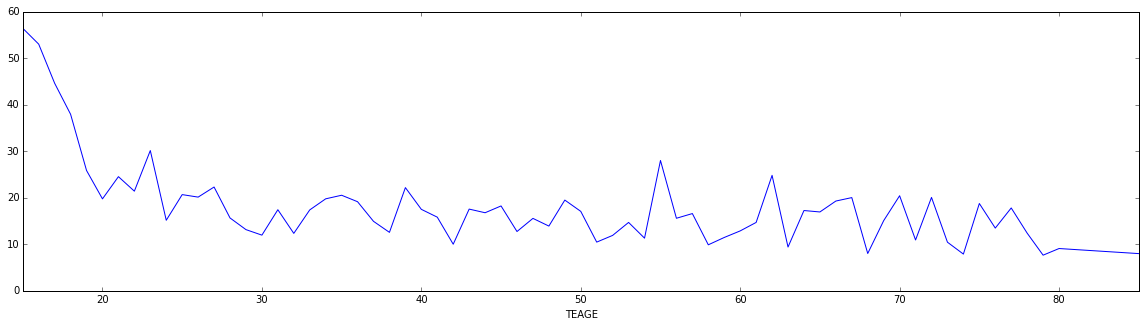

In [158]:
"""Group every age together and average out the minutes spent playing sport
this looks a whole lot better"""
pop_sports_avg = pop_sports_minutes.groupby(['TEAGE'])['minutes'].mean()
pop_sports_avg.plot(x='TEAGE', y='minutes', figsize=(20,5))

In [162]:
"""There is a much stronger inverse corrolation between age and time spent playing sports,
althought it is still not as strong as I would have guessed"""
pop_sports_avg = pd.DataFrame(pop_sports_avg)
pop_sports_avg = pop_sports_avg.reset_index()
pop_sports_avg.corr()

,TEAGE,minutes
TEAGE,1.000000,-0.564047
minutes,-0.564047,1.000000


###Anwer: People do get less active as they get older, but not in an extreme way

#Question 3: How does education relate to sports and exercise?

In [187]:
"""Make a table with just education level and minutes spent participating in sports"""
pop_edu= summary[['PEEDUCA']]
pop_edu['minutes'] = total_minutes(summary, '1301')

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [190]:
"""And like before, this doesn't corrolate at all really. 
Maybe if I group them together and get the average"""
pop_edu.corr()

,PEEDUCA,minutes
PEEDUCA,1.000000,0.013134
minutes,0.013134,1.000000


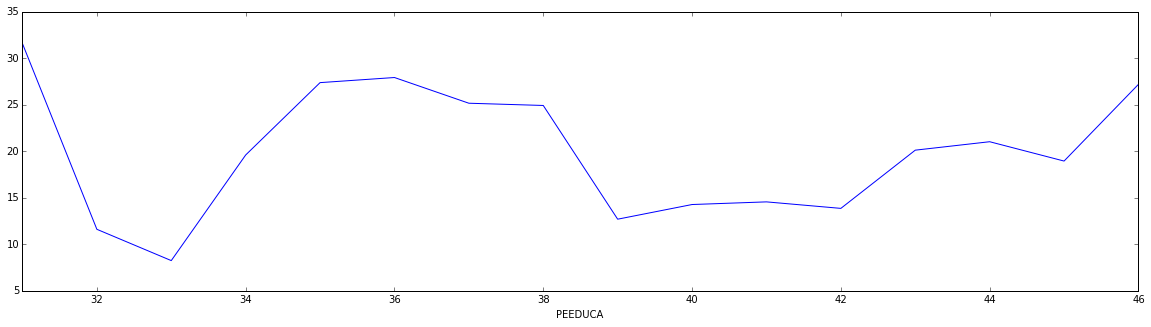

In [207]:
pop_edu_group = pop_edu.groupby(['PEEDUCA'])['minutes'].mean()
pop_edu_group.plot(x='PEEDUCA', y='minutes', figsize=(20,5))

In [209]:
pop_edu_group = pd.DataFrame(pop_edu_group)

In [212]:
"""From the graph, and the numbers, there is still no relation.."""
pop_edu_group = pop_edu_group.reset_index()
pop_edu_group.corr()

,PEEDUCA,minutes
PEEDUCA,1.000000,-0.031781
minutes,-0.031781,1.000000


###Answer: It doesn't
####What about watching sports? 

In [213]:
"""Make a table with just education level and minutes spent watching sports"""
pop_edu_watch= summary[['PEEDUCA']]
pop_edu_watch['minutes'] = total_minutes(summary, '1302')

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


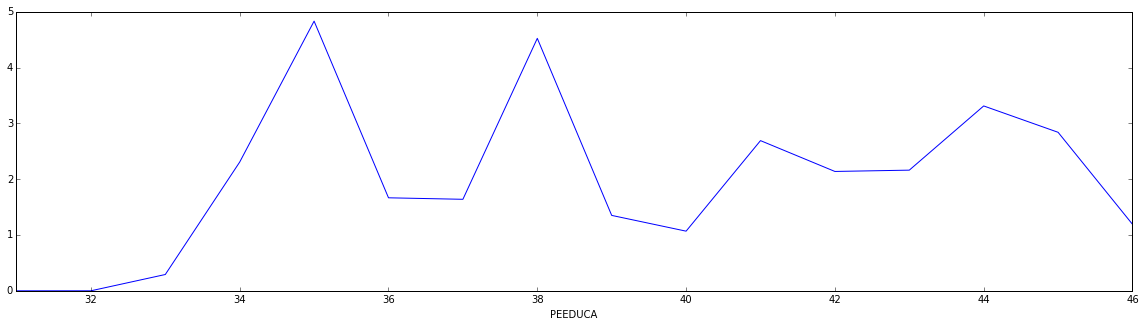

In [214]:
pop_edu_watch = pop_edu_watch.groupby(['PEEDUCA'])['minutes'].mean()
pop_edu_watch.plot(x='PEEDUCA', y='minutes', figsize=(20,5))

####Still no relation

In [216]:
"A table with time spent watching sports, and time spent playing them"
pop_watch_vs_par = summary[[]]
pop_watch_vs_par['watching'] = total_minutes(summary, '1302')
pop_watch_vs_par['playing'] = total_minutes(summary, '1301')

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [219]:
pop_watch_vs_par.corr()

,watching,playing
watching,1.000000,0.000852
playing,0.000852,1.000000


So watching and playing sports are not related. At all. Not even a little....

###How about eating and drinking? Is that related to sports? 

In [258]:
pop_eating_vs_sports = summary[[]]
pop_eating_vs_sports['e_and_d'] = total_minutes(summary, '11')
pop_eating_vs_sports['sports'] = total_minutes(summary, '13')

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [256]:
pop_eating_vs_sports.corr()

,e_and_d,sports
e_and_d,1.000000,-0.031126
sports,-0.031126,1.000000


###No. Time spent eating and drinking is not related to sports at all.